In [1]:
import load_dataframes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font', family='serif', size=14)
rc('text', usetex=True)

In [2]:
test_names = ['test2_mat2', 'test1_mat2', 'test6_mat1']

# Globally visible list to store crypt dataframes
#crypt_data_list = []
tdl = []
tdl2 = []
crypt_data_list = load_dataframes.main(tdl)
crypt_data_list_epi = load_dataframes.main(tdl2, mat_numbers = ['3', '3', '2'])


CRYPT0 - coarse Data for test2_mat2:
   crypt0/coarse_RF-crypt0_test2_mat2.npy
0                                0.007243
1                                0.016269
2                                0.022159
3                                0.026463
4                                0.029662

CRYPT0 - smooth Data for test2_mat2:
   crypt0/smooth_RF-crypt0_test2_mat2.npy
0                                0.007243
1                                0.018505
2                                0.026346
3                                0.031499
4                                0.035615

CRYPT0 - para Data for test2_mat2:
   crypt0/para_RF-crypt0_test2_mat2.npy
0                              0.007243
1                              0.014038
2                              0.017234
3                              0.020062
4                              0.022614

CRYPT1 - coarse Data for test1_mat2:
   crypt1/coarse_RF-crypt1_test1_mat2.npy
0                                0.002987
1                     

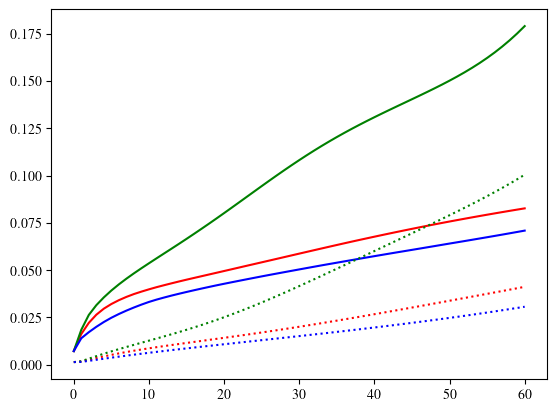

In [59]:
plt.plot(crypt_data_list[0][0], "r")
plt.plot(crypt_data_list[0][1], "g")
plt.plot(crypt_data_list[0][2], "blue")

plt.plot(crypt_data_list_epi[0][0], "r", linestyle="dotted")
plt.plot(crypt_data_list_epi[0][1], "g", linestyle="dotted")
plt.plot(crypt_data_list_epi[0][2], "blue", linestyle="dotted")

In [29]:
ls ic_epithelium/

crypt0_test2_epi.npy  crypt1_test1_epi.npy  crypt2_test6_epi.npy


## Crypt 1

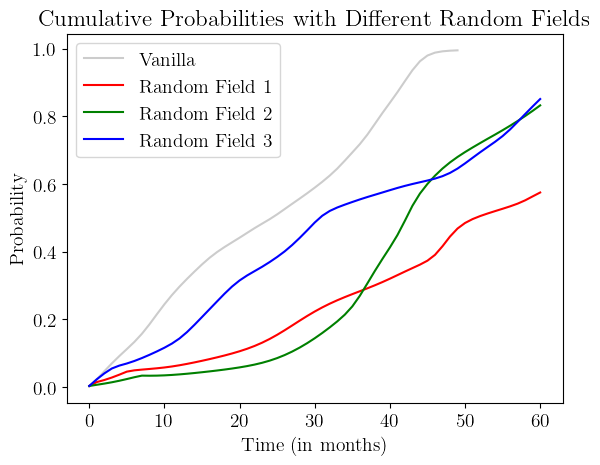

<Figure size 640x480 with 0 Axes>

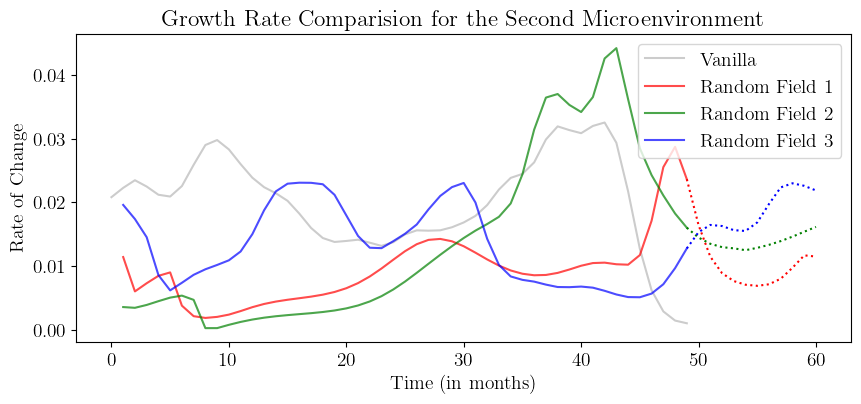

/tmp/ipykernel_562253/4030412351.py:49: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(np.abs(red_data), label="Random Field 1", fill=True, palette="Reds")
/tmp/ipykernel_562253/4030412351.py:50: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(np.abs(green_data), label="Random Field 2",  fill=True, palette="Greens")
/tmp/ipykernel_562253/4030412351.py:51: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(np.abs(blue_data),  label="Random Field 3", fill=True, palette="Blues")


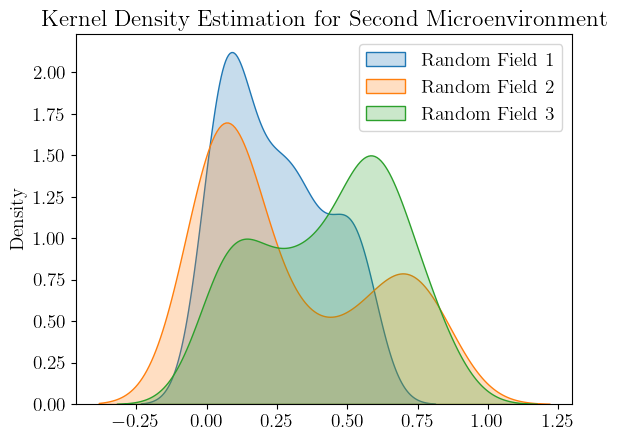

In [13]:
plt.plot(np.load("ic_epithelium/crypt1_test1_epi.npy"), linestyle="-", color="black", alpha = 0.2, label="Vanilla")
plt.plot(crypt_data_list[1][0][:], "r", linestyle="-", label="Random Field 1")
plt.plot(crypt_data_list[1][1][:], "g", linestyle="-", label="Random Field 2")
plt.plot(crypt_data_list[1][2][:], "b", linestyle="-", label="Random Field 3")
plt.legend()
# plt.plot(crypt_data_list[1][0][49:], "r", linestyle="dotted")
# plt.plot(crypt_data_list[1][1][49:], "g", linestyle="dotted")
# plt.plot(crypt_data_list[1][2][49:], "b", linestyle="dotted")
plt.ylabel("Probability")
plt.xlabel("Time (in months)")
plt.title("Cumulative Probabilities with Different Random Fields")
plt.savefig("c1+comparison_cumprob.png", dpi=600, bbox_inches="tight")
plt.show()
plt.clf()



plt.figure(figsize=(10, 4))

plt.plot(np.gradient(np.load("ic_epithelium/crypt1_test1_epi.npy"))[:], color="black", alpha=0.2, label="Vanilla")
# plt.show()
# plt.clf()


colors=["red", "green", "blue"]
for i, dataframe in enumerate(crypt_data_list[1]):
    # Calculate the differences between consecutive values
    diffs = dataframe.diff().abs().mean(axis=1)
    # Plot the results
    
    plt.plot(diffs[:50], linestyle="-",label=f'Random Field {i + 1}', color=colors[i], alpha=0.7)
    plt.plot(diffs[49:], linestyle="dotted", color=colors[i])
    plt.title(f'Growth Rate Comparision for the Second Microenvironment')#, {test_names[2]}, {dataframe.columns[0]}')
    plt.xlabel('Time (in months)')
    plt.ylabel('Rate of Change')
    plt.legend()

plt.savefig("c1+comparison_rate_change_prob.png", dpi=600, bbox_inches="tight")
plt.show()




red_data = crypt_data_list[1][0]["crypt1/coarse_RF-crypt1_test1_mat2.npy"]
green_data = crypt_data_list[1][1]["crypt1/smooth_RF-crypt1_test1_mat2.npy"]
blue_data = crypt_data_list[1][2]["crypt1/para_RF-crypt1_test1_mat2.npy"]

# Plot KDE for each color
sns.kdeplot(np.abs(red_data), label="Random Field 1", fill=True, palette="Reds")
sns.kdeplot(np.abs(green_data), label="Random Field 2",  fill=True, palette="Greens")
sns.kdeplot(np.abs(blue_data),  label="Random Field 3", fill=True, palette="Blues")

# Add labels and title
plt.xlabel("")
plt.ylabel("Density")
plt.title("Kernel Density Estimation for Second Microenvironment")

# Show legend
plt.legend()

plt.savefig("c1+comparison_KDE-estimation.png", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()

## CRYPT 2

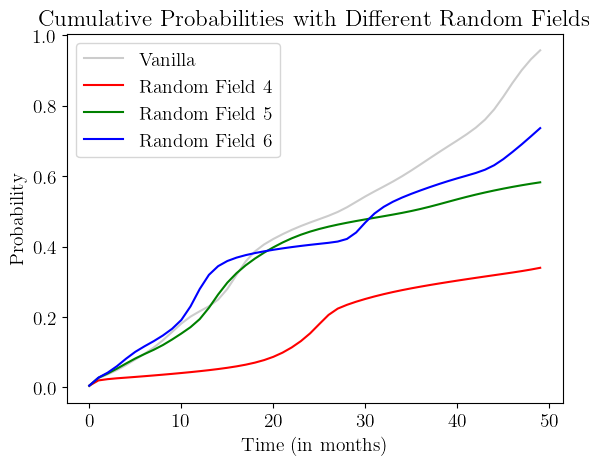

<Figure size 640x480 with 0 Axes>

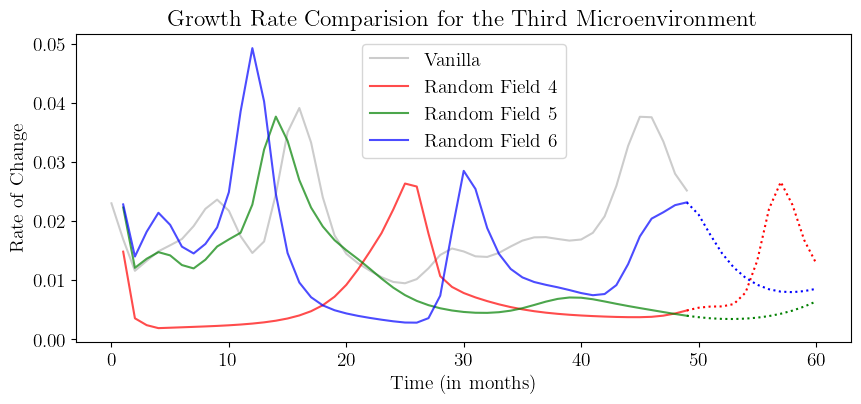

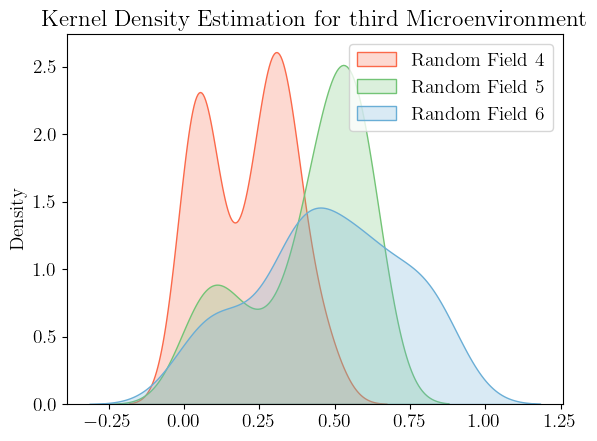

In [15]:
plt.plot(np.load("ic_epithelium/crypt2_test6_epi.npy"), linestyle="-", color="black", alpha = 0.2, label="Vanilla")
plt.plot(crypt_data_list[2][0][:50], "r", linestyle="-", label="Random Field 4")
plt.plot(crypt_data_list[2][1][:50], "g", linestyle="-", label="Random Field 5")
plt.plot(crypt_data_list[2][2][:50], "b", linestyle="-", label="Random Field 6")
plt.xlabel("Time (in months)")
plt.ylabel("Probability")
plt.title("Cumulative Probabilities with Different Random Fields")
# plt.plot(crypt_data_list[2][0][49:], "r", linestyle="dotted")
# plt.plot(crypt_data_list[2][1][49:], "g", linestyle="dotted")
# plt.plot(crypt_data_list[2][2][49:], "b", linestyle="dotted")
plt.legend()
plt.savefig("c2+comparison_cumprob.png", dpi=600, bbox_inches="tight")

plt.show()
plt.clf()



plt.figure(figsize=(10, 4))

plt.plot(np.gradient(np.load("ic_epithelium/crypt2_test6_epi.npy"))[:], color="black", alpha=0.2, label="Vanilla")
# plt.show()
# plt.clf()


colors=["red", "green", "blue"]
for i, dataframe in enumerate(crypt_data_list[2]):
    # Calculate the differences between consecutive values
    diffs = dataframe.diff().abs().mean(axis=1)
    # Plot the results
    
    plt.plot(diffs[:50], linestyle="-",label=f'Random Field {i + 4}', color=colors[i], alpha=0.7)
    plt.plot(diffs[49:], linestyle="dotted", color=colors[i])
    plt.title(f'Growth Rate Comparision for the Third Microenvironment')#, {test_names[2]}, {dataframe.columns[0]}')
    plt.xlabel('Time (in months)')
    plt.ylabel('Rate of Change')
    plt.legend()
plt.savefig("c2+comparison_rate_change_prob.png", dpi=600, bbox_inches="tight")
plt.show()




red_data = crypt_data_list[2][0][:]
green_data = crypt_data_list[2][1][:]
blue_data = crypt_data_list[2][2][:]

# Plot KDE for each color
# sns.kdeplot(np.load("ic_epithelium/crypt2_test6_epi.npy"), label="Vanilla", fill=True, palette="Bright")
sns.kdeplot(np.abs(red_data), label="Random Field 4", fill=True, palette="Reds")
sns.kdeplot(np.abs(green_data), label="Random Field 5",  fill=True, palette="Greens")
sns.kdeplot(np.abs(blue_data),  label="Random Field 6", fill=True, palette="Blues")


# Add labels and title
plt.xlabel("")
plt.ylabel("Density")
plt.title("Kernel Density Estimation for third Microenvironment")

# plt.title("KDE Plot for Crypt Data")

plt.savefig("c2+comparison_KDE-estimation.png", dpi=600, bbox_inches="tight")
# Show legend
plt.legend()

# Show the plot
plt.show()

In [173]:

pwd

'/home/purusharth/Documents/PLOT_MA/RandomFieldPlots/first_figure'